In [15]:
# 이 부분은 처음 한번만 실행하면 됌.
# 코드 수정 - "The reason is that the last Ubuntu update update supports chromium driver just via snap."
# 최근 우분투 업데이트에서 크롬 드라이버 설치를 snap을 이용해서만 하도록 바뀜
# 고로 snap 없이 설치하는 아래 우회 코드로 변경
# 출처 : https://colab.research.google.com/drive/1cbEvuZOhkouYLda3RqiwtbM-o9hxGLyC
# 출처2 : https://stackoverflow.com/questions/75155063/selenium-use-chrome-on-colab-got-unexpectedly-exited

%%shell
# Ubuntu no longer distributes chromium-browser outside of snap
#
# Proposed solution: https://askubuntu.com/questions/1204571/how-to-install-chromium-without-snap

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

# Install chromium and chromium-driver
apt-get update
apt-get install chromium chromium-driver

# Install selenium
pip install selenium

Executing: /tmp/apt-key-gpghome.wImZe4HTYG/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: public key "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.gA7HZEKYVX/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: public key "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.0jCP01FryH/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: public key "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Get:1 http://deb.debian.org/debian buster InRelease [122 kB]
Hit:2 http://archive.ubuntu.com/ubuntu 

In [69]:
# -*- coding: UTF-8 -*-
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
import requests

In [17]:
#Colab에선 웹브라우저 창이 뜨지 않으므로 별도 설정한다.

options = webdriver.ChromeOptions()
options.add_argument('--headless')        # Head-less 설정
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(options=options)

In [18]:
#네이버페이가 가능한 상품중 하나, url로 이동
url = 'https://smartstore.naver.com/s2nd/products/6368309520?n_media=11068&n_query=%EB%A6%BD%EC%8A%A4%ED%8B%B1&n_rank=1&n_ad_group=grp-a001-02-000000030373261&n_ad=nad-a001-02-000000212579876&n_campaign_type=2&n_mall_id=ncp_1nkr5r_01&n_mall_pid=6368309520&n_ad_group_type=2&NaPm=ct%3Dliv1ml60%7Cci%3D0yW0000n6CzyVuMsbflZ%7Ctr%3Dpla%7Chk%3D89005dc53d95a7f15d2681e9ed4e8020b7953211'
driver.get(url)

In [29]:
# 페이지의 html 소스 가져오기
html = driver.page_source

<html lang="ko"><head>
    <meta charset="utf-8">
    <meta http-equiv="Cache-Control" content="no-cache, no-store, must-revalidate">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1">
    <meta name="description" content="[에스투엔디] 언니부터 막내까지 금손부터 곰손까지 이지뷰티의 처음과 끝 START TO END">

<meta property="og:title" content="[1+1] S2ND 엔드 루즈 코벳 전색상 립스틱 구름텍스처+깊은컬러감 8컬러 : 에스투엔디">
<meta property="og:image" content="https://shop-phinf.pstatic.net/20230201_239/16752287091333rR19_JPEG/76364604865256746_864649829.jpg?type=o1000">
<meta property="og:description" content="[에스투엔디] 언니부터 막내까지 금손부터 곰손까지 이지뷰티의 처음과 끝 START TO END">
<meta property="og:type" content="article">
<meta name="twitter:title" content="[1+1] S2ND 엔드 루즈 코벳 전색상 립스틱 구름텍스처+깊은컬러감 8컬러 : 에스투엔디">
<meta name="twitter:image" content="https://shop-phinf.pstatic.net/20230201_239/16752287091333rR19_JPEG/76364604865256746_864649829.jpg?type=o1000">
<meta name="twitter:descr
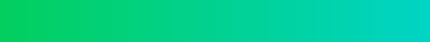
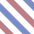
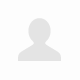
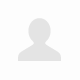

In [74]:
print(html)

In [57]:
# class = _9F9CWn02VE인거 찾기, 상품상세이미지의 class는 "_9F9CWn02VE"로 동일
div_elements = driver.find_elements(By.CLASS_NAME,"_9F9CWn02VE")

In [64]:
# class = _9F9CWn02VE의 하위  모든 img 태그 찾기
image_elements = []
for div_element in div_elements:
    images = div_element.find_elements(By.TAG_NAME,'img')
    image_elements.extend(images)

In [65]:
len(image_elements) # img 15개 확인

15

In [66]:
image_elements

[<selenium.webdriver.remote.webelement.WebElement (session="a2b996c48c72976d06361738adf3a48b", element="070aef66-2bfa-4718-b973-7c8372e25eaf")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a2b996c48c72976d06361738adf3a48b", element="2542f1a5-05f9-444f-b30a-a39ccba99c16")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a2b996c48c72976d06361738adf3a48b", element="a073659f-6fb7-40fe-9a6c-5472f8ccbcad")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a2b996c48c72976d06361738adf3a48b", element="70fe7adf-0d58-4cb1-b39e-e2ee0697d19b")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a2b996c48c72976d06361738adf3a48b", element="106a3694-a501-43f1-bfb1-a90459f4a8a1")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a2b996c48c72976d06361738adf3a48b", element="76fea39c-dab9-4cdd-8ef5-5fdc6b7249d2")>,
 <selenium.webdriver.remote.webelement.WebElement (session="a2b996c48c72976d06361738adf3a48b", element="749f31f1-ba46-4ba5-940c-42

In [75]:
for index, element in enumerate(image_elements):
    # data-src에 있는 이미지 링크 가져오기
    src = element.get_attribute("data-src")

    response = requests.get(src)
    # 요청한 이미지가 200인것만 그 외에는 다운 실패
    if response.status_code == 200:
        filename = f"image_{index+1}.jpg"  # 각 이미지마다 다른 이름으로 저장
        with open(filename, 'wb') as f:
            f.write(response.content)
    else:
        print(f"이미지 다운로드 실패: {src}") # 이미지 태그안에 링크는 있지만 이미지 자체가 없는 경우 404error 뜸

소스 URL에서 이미지를 다운로드하는 데 실패했습니다: https://ai.esmplus.com/s2ndshop/scr/new/endrouge/15.jpg


In [ ]:
# driver.quit()

# 토마토

In [81]:
url = 'https://smartstore.naver.com/thefarm_/products/5662367023?NaPm=ct%3Dliv61kxk%7Cci%3D1863da82201469c168bed0a4fe26f3377fd0985f%7Ctr%3Dslsl%7Csn%3D3854438%7Chk%3Dc0d3cfc860521663716adf5dd4b14c29fecc015b'
driver.get(url)

In [86]:
# 페이지의 html 소스 가져오기
html = driver.page_source

<html lang="ko"><head>
    <meta charset="utf-8">
    <meta http-equiv="Cache-Control" content="no-cache, no-store, must-revalidate">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1">
    <meta name="description" content="완숙토마토 찰토마토 토마토 흑토마토 찰토마토 맛있는토마토 고품질 토마토 못난이토마토">
<meta name="keywords" content="찰토마토,흑토마토,쿠마토,맛있는토마토,방울토마토,완숙토마토,토마토5kg,토마토10kg,대추방울토마토,건강한과일,토마토,푸드맛킹,완숙토마토 찰토마토,완숙토마토 찰토마토,푸드맛킹">
<meta property="og:title" content="완숙토마토 찰토마토 토마토 흑토마토 찰토마토 맛있는토마토 고품질 토마토 못난이토마토 : 푸드맛킹">
<meta property="og:image" content="https://shop-phinf.pstatic.net/20220101_137/1641040059708Ne17w_PNG/42175893513456798_1982325340.png?type=o1000">
<meta property="og:description" content="완숙토마토 찰토마토 토마토 흑토마토 찰토마토 맛있는토마토 고품질 토마토 못난이토마토">
<meta property="og:type" content="article">
<meta name="twitter:title" content="완숙토마토 찰토마토 토마토 흑토마토 찰토마토 맛있는토마토 고품질 토마토 못난이토마토 : 푸드맛킹">
<meta name="twitter:image" content="https://shop-phi
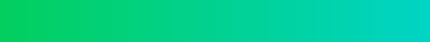
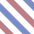
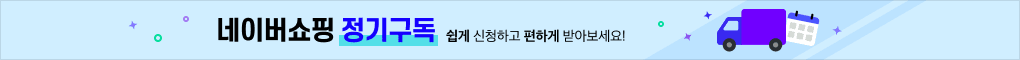
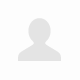
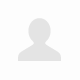

In [87]:
print(html)

In [88]:
div_elements = driver.find_elements(By.CLASS_NAME,"_9F9CWn02VE")

In [89]:
image_elements = []
for div_element in div_elements:
    images = div_element.find_elements(By.TAG_NAME,'img')
    image_elements.extend(images)

In [90]:
len(image_elements)

49

In [91]:
for index, element in enumerate(image_elements):
    # data-src에 있는 이미지 링크 가져오기
    src = element.get_attribute("data-src")

    response = requests.get(src)
    # 요청한 이미지가 200인것만 그 외에는 다운 실패
    if response.status_code == 200:
        filename = f"tomato_{index+1}.jpg"  # 각 이미지마다 다른 이름으로 저장
        with open(filename, 'wb') as f:
            f.write(response.content)
    else:
        print(f"이미지 다운로드 실패: {src}") # 이미지 태그안에 링크는 있지만 이미지 자체가 없는 경우 404error 뜸

In [ ]:
# driver.quit()

# 수박

In [92]:
url = 'https://smartstore.naver.com/fruitggun/products/6458232156?NaPm=ct%3Dliv7nh1c%7Cci%3Deb97de69b8396db3b9ab3732e74f22b287828c9b%7Ctr%3Dslsl%7Csn%3D813670%7Chk%3D8c1dc7153c92f5073d1237e348cfe0cb2ec19e30'
driver.get(url)

In [93]:
# 페이지의 html 소스 가져오기
html = driver.page_source

<html lang="ko"><head>
    <meta charset="utf-8">
    <meta http-equiv="Cache-Control" content="no-cache, no-store, must-revalidate">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1">
    <meta name="description" content="[과일꾼] 나주배 전문 프리미엄 과일 브랜드입니다. 품질 좋은 농산물을 합리적인 가격으로 제공합니다.">
<meta name="keywords" content="맛있는과일,상큼과일,신선과일,수박,과일꾼,과일꾼,수박,과일꾼">
<meta property="og:title" content="프리미엄 고당도 꿀 수박 씨없는 수박 애플수박 흑수박 : 과일꾼">
<meta property="og:image" content="https://shop-phinf.pstatic.net/20230601_80/16856156343275f5SX_JPEG/31359302091752540_1324864369.jpg?type=o1000">
<meta property="og:description" content="[과일꾼] 나주배 전문 프리미엄 과일 브랜드입니다. 품질 좋은 농산물을 합리적인 가격으로 제공합니다.">
<meta property="og:type" content="article">
<meta name="twitter:title" content="프리미엄 고당도 꿀 수박 씨없는 수박 애플수박 흑수박 : 과일꾼">
<meta name="twitter:image" content="https://shop-phinf.pstatic.net/20230601_80/16856156343275f5SX_JPEG/31359302091752540_1324864369.
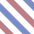
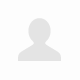
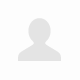

In [94]:
print(html)

In [95]:
div_elements = driver.find_elements(By.CLASS_NAME,"_9F9CWn02VE")

In [96]:
image_elements = []
for div_element in div_elements:
    images = div_element.find_elements(By.TAG_NAME,'img')
    image_elements.extend(images)

In [97]:
len(image_elements)

50

In [98]:
for index, element in enumerate(image_elements):
    # data-src에 있는 이미지 링크 가져오기
    src = element.get_attribute("data-src")

    response = requests.get(src)
    # 요청한 이미지가 200인것만 그 외에는 다운 실패
    if response.status_code == 200:
        filename = f"wm_{index+1}.jpg"  # 각 이미지마다 다른 이름으로 저장
        with open(filename, 'wb') as f:
            f.write(response.content)
    else:
        print(f"이미지 다운로드 실패: {src}") # 이미지 태그안에 링크는 있지만 이미지 자체가 없는 경우 404error 뜸

In [ ]:
# driver.quit()  전체 driver 종료
# driver.close() 해당 driver만 종료